In [2]:
import spacy
import torch
from torchtext import data, datasets
from torchtext.vocab import Vectors
from torch.nn import init
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

DEVICE = torch.device("cuda:0")

In [3]:
spacy_en = spacy.load('en_core_web_lg')
def tokenizer(text):
    return [tok.text for tok in spacy_en.tokenizer(text)]
LABEL = data.Field(sequential=False, use_vocab=False)
TEXT = data.Field(sequential=True, tokenize=tokenizer, lower=True)

/home1/yy/anaconda3/envs/nlp-hw/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [4]:
train, val = data.TabularDataset.splits(
    path='./data', train='train.csv', validation='dev.csv', format='csv', skip_header=True,
    fields=[('label_id', LABEL), ('title', TEXT), ('description', TEXT)]
)
TEXT.build_vocab(train, vectors='glove.840B.300d')

/home1/yy/anaconda3/envs/nlp-hw/lib/python3.7/site-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/home1/yy/anaconda3/envs/nlp-hw/lib/python3.7/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)


In [4]:
len(train), len(val)

(108264, 11736)

In [5]:
print(train[0].label_id)
print(train[0].title)
print(train[0].description)

3
['wall', 'st.', 'bears', 'claw', 'back', 'into', 'the', 'black', '(', 'reuters', ')']
['reuters', '-', 'short', '-', 'sellers', ',', 'wall', 'street', "'s", 'dwindling\\band', 'of', 'ultra', '-', 'cynics', ',', 'are', 'seeing', 'green', 'again', '.']


In [6]:
train_title_lengths = list(map(lambda x: len(x.title), train))
train_description_lengths = list(map(lambda x: len(x.description), train))

In [7]:
import numpy as np

In [8]:
np.max(train_title_lengths), np.min(train_title_lengths), np.mean(train_title_lengths)

(29, 1, 7.86687172097835)

In [9]:
np.max(train_description_lengths), np.min(train_description_lengths), np.mean(train_description_lengths)

(212, 3, 36.13753417571861)

In [19]:
np.percentile(train_title_lengths, 95), np.percentile(train_title_lengths, 99)

(13.0, 17.0)

In [20]:
np.percentile(train_description_lengths, 95), np.percentile(train_description_lengths, 99)

(56.0, 78.0)

In [12]:
def draw_graph(data):
    x = sorted(np.unique(data))
    y = [np.sum(np.array(data) == item) for item in x]
    c_y = [sum(y[:i + 1]) for i in range(len(y))]
    return x, y, c_y

In [13]:
x, y, c_y = draw_graph(train_title_lengths)

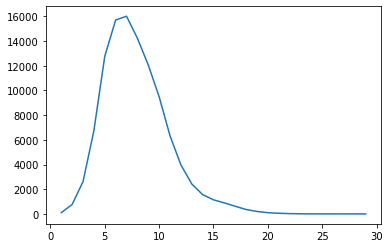

In [14]:
plt.plot(x, y)

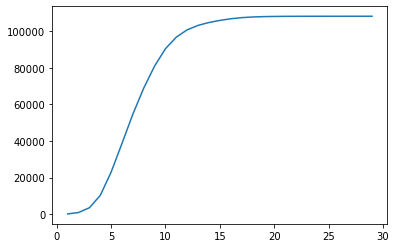

In [15]:
plt.plot(x, c_y)

In [16]:
x, y, c_y = draw_graph(train_description_lengths)

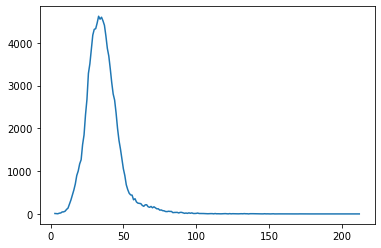

In [17]:
plt.plot(x, y)

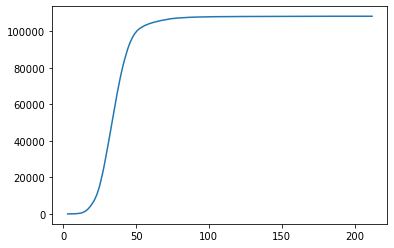

In [18]:
plt.plot(x, c_y)

In [7]:
import numpy as np
all_labels = np.array(list(train.label_id))
sum(all_labels == "1"), sum(all_labels == "2"), sum(all_labels == "3"), sum(all_labels == "4")

(27198, 27020, 26897, 27149)

In [8]:
all_labels = np.array(list(val.label_id))
sum(all_labels == "1"), sum(all_labels == "2"), sum(all_labels == "3"), sum(all_labels == "4")

(2802, 2980, 3103, 2851)